# DS 3000 - Practicum 2 (Group 25)

**Student Names:** Jennifer Shishmanian, Elizabeth Lattanzi, Sophie Sawyers

**Due Date:** 6/23/24

In this practicum, you will work with a dataset that can be used to understand the relationship between lifestyle and diabetic outcomes for patients in the USA. The dataset that you will work with is called [CDC Diabetes Health Indicators](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). that was obtained from the Behavioral Risk Factor Surveillance System (BRFSS) which is publicly available on the [CDC's website](https://www.cdc.gov/brfss/annual_data/annual_2015.html). The purpose of BRFSS is to collect data on various health-related factors. The CDC estimates that millions of Americans are either unaware that they have diabetes or are at risk i.e. they are pre-diabetic. There are many factors that influence the prevalence of diabetes, such as age, location, race, and other [social determinants of health](https://health.gov/healthypeople/priority-areas/social-determinants-health). The purpose of this practicum is to use Data Science and Machine Learning to gain more insights.

*Note: remember that there are several factors that determines diabetic outcomes. While this practicum gives you the opportunity to understand some of these factors, remember that there are still data points about diabetes that are not captured in this dataset. Keep in mind the scope that you are working with, state any assumptions that you make but always remember the context of this practicum.*

**Note:**
- **Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.**
- **Use markdown cells to explain your observations about the data.**
- **Include the names of all teammates on all submissions.**
- **Ensure that your Python code is in a code cell and that it executes without errors.**

**Data:** [diabetes_012_health_indicators_BRFSS2015.csv](https://northeastern.instructure.com/courses/179224/files/28228210?wrap=1)

**Data Dictionary:** https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files
import io
sns.set_style('darkgrid')

## Question 1 - The DS Problem (0 pts) - **Sophie**

- In your own words, formulate the Data Science problem.

In this practicum, we will be exploring a dataset provided by the Behavioral Risk Factor Surveillance System (BRFSS) that includes information about diabetes diagnoses for patients in the United States. The goal of this analysis will be to determine which lifestyle factors are most influential in the onset of diabetes using patient information in the dataset. During this process, we will examine the 21 different features in the data consisting of demographics, lab results, and survey question answers provided by the patients. After our analysis, we can aim to provide recommendations based on our findings suggesting which features proved to be most important in diagnosing patients with diabetes (or perhaps, as pre-diabetic). This task is important for two reasons:
1. It provides further insight on how diabetes can possibly be prevented if patients work to ensure identified features are in optimal condition
2. If the most influential features are social determinants of health (which are not as easily adjusted), such as education or income, the task can point out larger-scale inequalities resulting in adverse health impacts in those communities.

According to the CDC, 38.4 million Americans (11.6% of the population) were diagnosed with diabetes in 2021. In order to lower these numbers and keep the population healthy, it is important to identify ways in which individuals can make conscious healthy decisions on their own as well as possible systemic factors that make it difficult for minority groups to maintain their health so that they may be eliminated.

## Question 2 - Prepare the Data (5 pts) - **Jennifer**

- Evaluate the dataset to determine if **ALL variables are represented in their expected type**. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables and represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.

In [2]:
# load dataset
uploaded = files.upload()
print("Uploaded files:", uploaded.keys())

# Use the first key from the uploaded dictionary to load the data
file_name = next(iter(uploaded))
print("Using file:", file_name)
df = pd.read_csv(io.BytesIO(uploaded[file_name]))



Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv
Uploaded files: dict_keys(['diabetes_012_health_indicators_BRFSS2015.csv'])
Using file: diabetes_012_health_indicators_BRFSS2015.csv


In [3]:
# inspect dimensions
print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1]))

There are 253680 rows and 22 columns


In [4]:
# view data
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [5]:
# get data types
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
# check the frequency of null values in each column
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# for binary 0=no, 1=yes
# Binary: HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseasorAttack,
  # PhysActivity, Fruits, Veggies, HvyAlcoholComsump, AnyHealthcare, NoDocbcCost,
  # DiffWalk, Sex (0=female 1=male)
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
               'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
               'DiffWalk', 'Sex']
df[binary_cols] = df[binary_cols].astype('int')

# BMI - integer body mass index
# MentHlth - integer scale 1-30
  # for how many days during the past 30 days was your mental health not good?
# PhysHlth - integer scale 1-30
  # for how many days during the past 30 days was your physical health not good?
integer_cols = ['Diabetes_012', 'BMI', 'MentHlth', 'PhysHlth']
df[integer_cols] = df[integer_cols].astype('int')

# GenHlth - categorical 1=excellent 2=very good 3=good 4=fair 5=poor
  # would you say that in general you health is: scale 1-5
# Age - integer/category 1=18-24 9=60-64 13=80+
  # 13 level age category 5 year range
# Education - category/integer scale 1-6
  # 1= never attended school or only kindergarten
  # 2= grades 1-8 (elementary)
  # 3= grades 9-11 (some high school)
  # 4= grade 12 or GED (high school graduate)
  # 5= college 1-3 years (some college or technical school)
  # 6= college 4 years or more (college graduate)
# Income - category/integer scale 1-8 (see INCOME2 codebook)
  # 1=less than $10,000
  # 5=less than $35,000
  # 8=$75,000 or more
categorical_cols = ['GenHlth', 'Age', 'Education', 'Income']
df[categorical_cols] = df[categorical_cols].astype('category')

In [8]:
df.dtypes

Diabetes_012               int64
HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                   int64
Sex                        int64
Age                     category
Education               category
Income                  category
dtype: object

In [9]:
# handle invalid data
valid_ranges = {
    'Diabetes_012': [0, 1, 2],
    'HighBP': [0, 1],
    'HighChol': [0, 1],
    'CholCheck': [0, 1],
    'Smoker': [0, 1],
    'Stroke': [0, 1],
    'HeartDiseaseorAttack': [0, 1],
    'PhysActivity': [0, 1],
    'Fruits': [0, 1],
    'Veggies': [0, 1],
    'HvyAlcoholConsump': [0, 1],
    'AnyHealthcare': [0, 1],
    'NoDocbcCost': [0, 1],
    'DiffWalk': [0, 1],
    'Sex': [0, 1],
    'BMI': range(0, 100),  # Arbitrary upper bound
    'MentHlth': range(0, 31),
    'PhysHlth': range(0, 31),
    'GenHlth': [1, 2, 3, 4, 5],
    'Age': range(1, 14),
    'Education': range(1, 7),
    'Income': range(1, 9)
}

# validate and remove invalid rows
for column, valid_range in valid_ranges.items():
  df = df[df[column].isin(valid_range)]

In [10]:
# handle outliers
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Identify outliers in continuous variables
outliers_bmi = detect_outliers(df['BMI'])
outliers_menthlth = detect_outliers(df['MentHlth'])
outliers_physhlth = detect_outliers(df['PhysHlth'])

print(f'BMI outliers: {outliers_bmi.sum()}')
print(f'MentHlth outliers: {outliers_menthlth.sum()}')
print(f'PhysHlth outliers: {outliers_physhlth.sum()}')

BMI outliers: 9847
MentHlth outliers: 36208
PhysHlth outliers: 40949


In [11]:
# inspect dimensions
print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1]))

There are 253680 rows and 22 columns


1. All columns are converted to suitable data types for analysis
2. No missing values found so no imputation needed
3. All columns checked and filtered for valid entries

In [12]:
# gather summary statistics
df.describe().round(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex
count,253680.0,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.3,0.43,0.42,0.96,28.38,0.44,0.04,0.09,0.76,0.63,0.81,0.06,0.95,0.08,3.18,4.24,0.17,0.44
std,0.7,0.49,0.49,0.19,6.61,0.50,0.20,0.29,0.43,0.48,0.39,0.23,0.22,0.28,7.41,8.72,0.37,0.50
min,0.0,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.0,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,0.0,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,0.00,1.00
max,2.0,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,30.00,30.00,1.00,1.00


## Question 3 - (35 pts) - **Sophie**

- Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

Based on [this](https://health.gov/healthypeople/priority-areas/social-determinants-health) article by the US Department of Health and Human Services, there are five domains of the Social Determinants of Health: Economic Stability, Education Access and Quality, Health Care Access and Quality, Neighborhood and Built Environment, and Social and Community Context. There are no pre-set features in the dataset classified as social determinants of health, but based on this definition above, we will consider 'NoDocbcCost' (a Health Care Access and Quality variable, specifically affecting access because the patient was unable to pay even if a doctor was available), 'Education' (Education Access and Quality), 'Income' (Economic Stability), and 'Smoker' (Neighborhood and Built Environment) as social determinants of health. We will also consider the feature 'HvyAlcoholConsump' as a Social and Community Context variable.


Diabetic outcomes are represented by the variable 'Diabetes_012'. This will guide our exploratory data analysis.

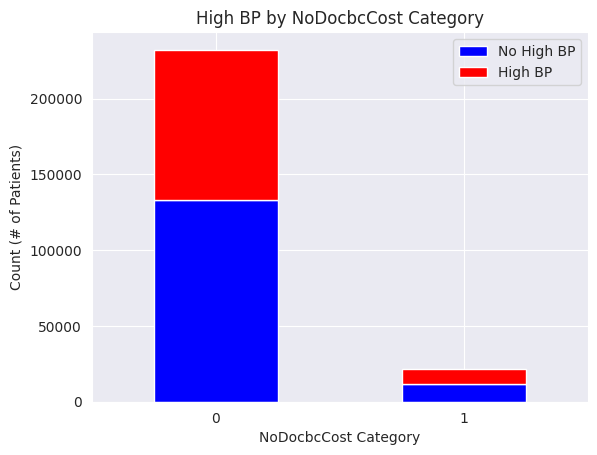

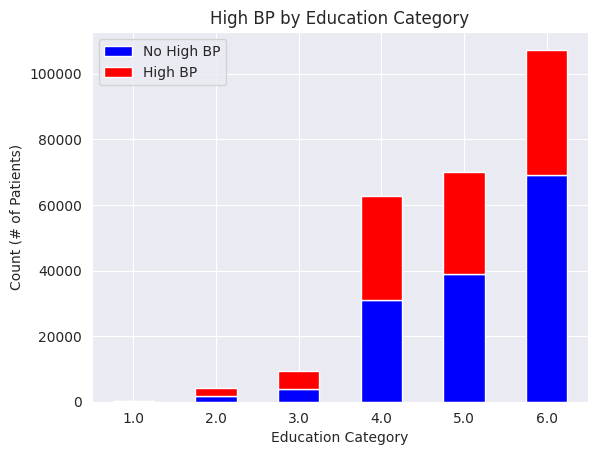

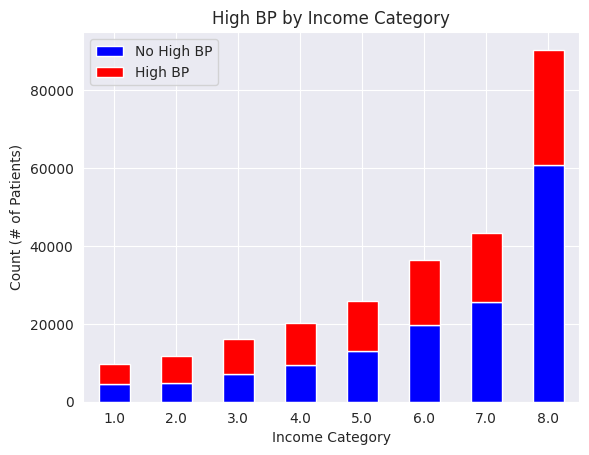

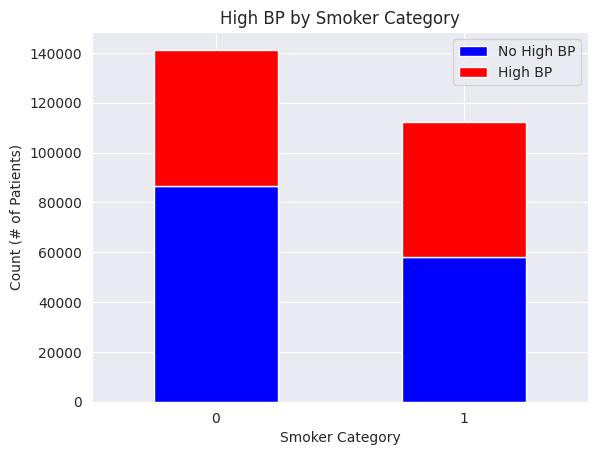

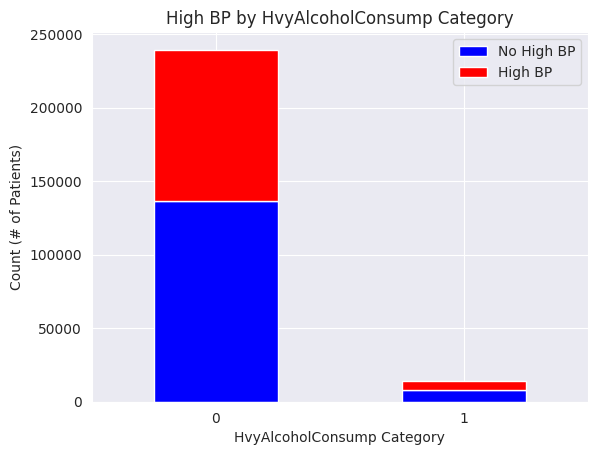

In [13]:
# visualize relationship between each social determinant of health and various features in the dataset using stacked bar charts

social_determinants = ['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']

# first feature of interest: HighBP

for social_determinant in social_determinants:
  grouped_df = df.groupby(social_determinant)['HighBP'].value_counts().unstack()
  grouped_df.plot(kind = 'bar', stacked = True, color = ['blue', 'red'])

  plt.title(f'High BP by {social_determinant} Category')
  plt.xlabel(f'{social_determinant} Category')
  plt.ylabel('Count (# of Patients)')
  plt.xticks(rotation = 0)
  plt.legend(['No High BP', 'High BP'])
  plt.show()

We first visualized the 'HighBP' variable to see how social determinants may affect a patient's blood pressure. In particular, we assumed that poor social conditions would result in higher blood pressure as patients are more stressed. Looking at this variable can show us how social determinants have a tangible impact on a health metric for patients.

From the first graph, we can see that for patients who could access a doctor when they needed one (NoDocbcCost = 0), more patients had no high blood pressure. For patients who could not access a doctor (NoDocbcCost = 1), there was a relatively even split between those who did not have high blood pressure than those who did. In the second graph, there is not enough information on patients who never attended school (Education = 1) to make a conclusion. However, for patients who were less educated (Education = 2 or 3), more patients had high blood pressure than no high blood pressure. For patients who were more educated with at least a high school degree all the way through college (Education = 4, 5, or 6), more patients did not have high blood pressure than did. **This suggests that as education increases, frequencies of high blood pressure decreases.** The third graph depicting the relationship between income and high blood pressure shows that for low income categories (Income = 1, 2, or 3), more patients were likely to have high blood pressure than no high blood pressure. Where Income = 4, patients seem evenly split between the two categories. **For higher income levels (Income = 5, 6, 7, or 8), more patients had no high blood pressure than those who did, suggesting that as income increases, high blood pressure decreases.** For both the fourth and fifth graphs, depicting the relationship between smoking and high alcohol consumption with high blood pressure rates, respectively, non-smokers (Smoker = 0) and those who did not consume high amounts of alcohol (HvyAlcoholConsumption = 0) had more patients who did not have high blood pressure than those who did. Interestingly, both smokers (Smoker = 1) and heavy drinkers (HvyAlcoholConsumption = 1) had relatively equal distributions between high blood pressure patients and non-high blood pressure patients, with heavy drinkers skewing slightly to having more non-high blood pressure patients. **This indicates that non-smokers and people who do not consume heavy amounts of alcohol tend to not have high blood pressure, while there may not be a clear relationship for smokers and heavy drinkers as it pertains to blood presssure.**

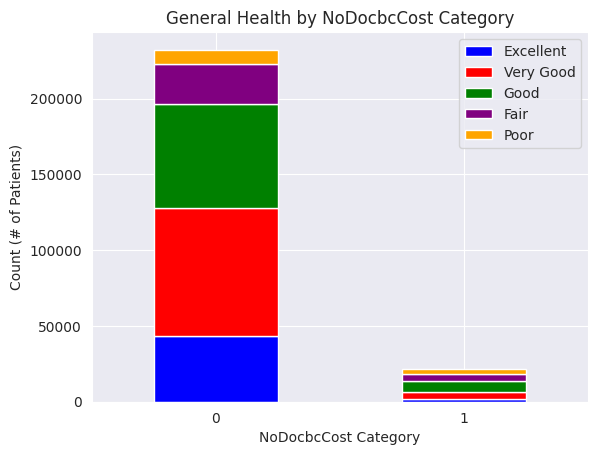

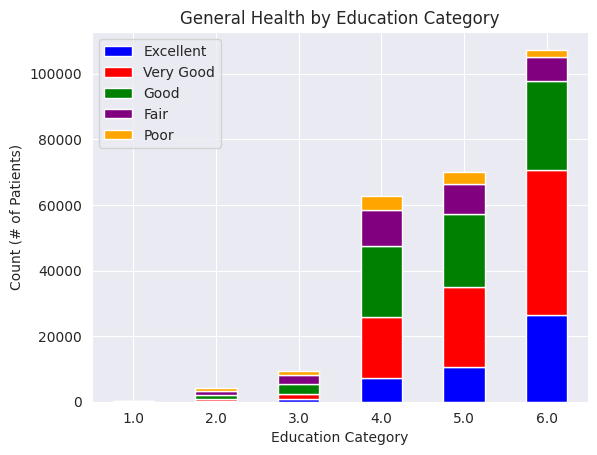

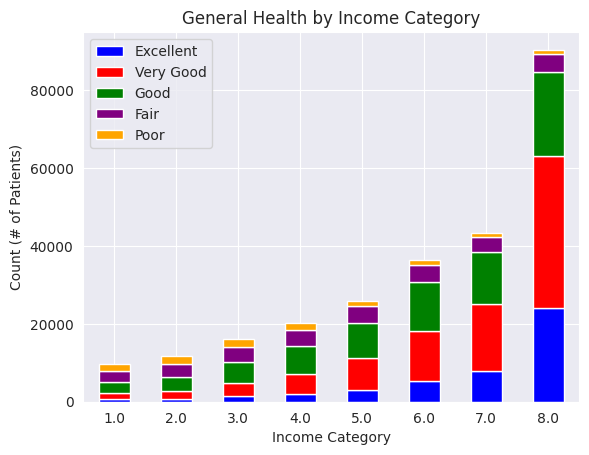

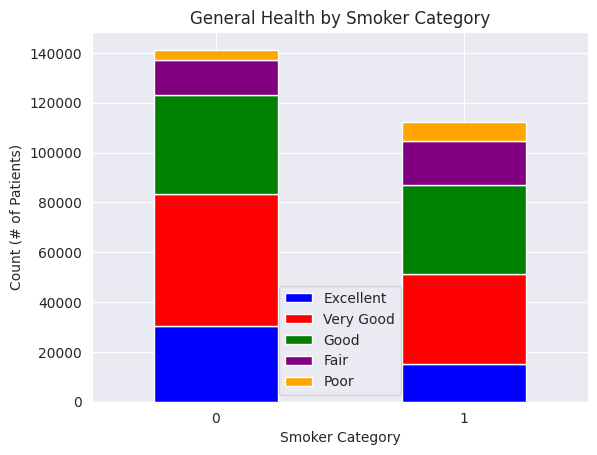

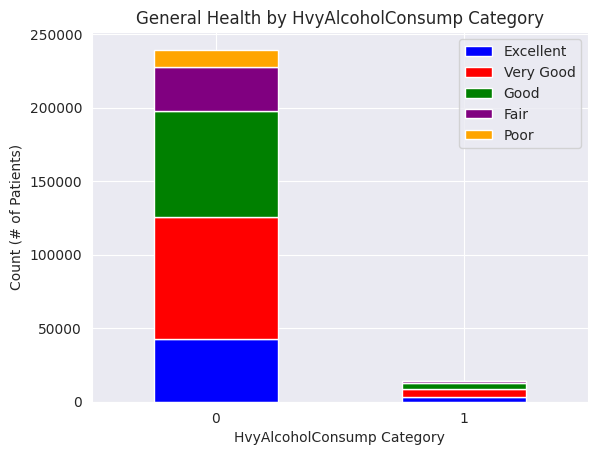

In [14]:
# second feature of interest: GenHlth

for social_determinant in social_determinants:
  grouped_df = df.groupby(social_determinant)['GenHlth'].value_counts().unstack()
  grouped_df.plot(kind = 'bar', stacked = True, color = ['blue', 'red', 'green', 'purple', 'orange'])

  plt.title(f'General Health by {social_determinant} Category')
  plt.xlabel(f'{social_determinant} Category')
  plt.ylabel('Count (# of Patients)')
  plt.xticks(rotation = 0)
  plt.legend(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
  plt.show()

Next, we visualized the 'GenHlth' variable to see how social determinants may affect a patient's overall health and, perhaps more importantly, how these patients view their **own** health. In particular, we assumed that poor social conditions would result in patients rating their health more poorly than those in good social conditions. Looking at this variable can show us how social determinants have an effect on how patients tend to evaluate and perceive their own overall health.

From the first graph, we can see that for patients who could access a doctor when they needed one (NoDocbcCost = 0), most patients evaluated their health as 'Very Good', followed by 'Good' then 'Excellent'. For patients who could not access a doctor (NoDocbcCost = 1), it seems as though most patients rated their health as 'Good', followed by 'Very Good' then 'Fair', although it is hard to tell given the smaller number of patients in this category. We would expect those who have access to a doctor to rate their health as 'Very Good', though it is somewhat surprising patients who did not have access to a doctor when needed still rated their health as 'Good'. In the second graph, there is once again not enough information on patients who never attended school (Education = 1) to make a conclusion, and too little information on patients who attended school Grades 1-8 (Education = 2) to make a definitive conclusion either. However, for patients who had some high school education (Education = 3), most patients rated their health as 'Good', followed by 'Fair'. For patients with a high school degree (Education = 4), most ranked their health as 'Good', followed by 'Very Good', 'Fair', 'Excellent', and 'Poor', respectively. For patients with some college education (Education = 5), these rankings are the same, except 'Good' and 'Very Good' appear to be relatively equal. Finally, for patients who are college graduates, most rank their health as 'Very Good', followed by 'Excellent', 'Good', Fair', and 'Poor'. **This suggests that as education increases, rankings of health tend to improve.** Still, it is worth noting no group had most patients ranking their health as 'Excellent', even amongst the most educated; maybe people don't want to overstate their health status? The third graph depicting the relationship between income and general health shows that for patients who make anything less than $35,000 per year categories (Income = 1, 2, 3, 4, 5), most patients tend to rate their health as 'Good', followed by 'Very Good', ' 'Fair', 'Excellent', then 'Poor' in most cases (more variablility for Income = 1 and Income = 2). For higher income levels (Income = 6, 7, or 8), most patients rank their health as 'Very Good', followed by 'Good', 'Excellent', 'Fair', then 'Poor', although at Income = 6, 'Very Good' and 'Good' ratings were relatively equal. **This seems to indicate that as income levels increase, health rankings improve as well since most patients in the first five categories rated their health as 'Good' while most patients in the top three categories ranked their health as 'Very Good' (with a turning point at Income = 6 where these rankings were nearly equal).** For both the fourth and fifth graphs, depicting the relationship between smoking and high alcohol consumption with general health, respectively, **non-smokers (Smoker = 0) and those who did not consume high amounts of alcohol (HvyAlcoholConsumption = 0) had most patients rate their general health as 'Very Good'**, followed by 'Good', 'Excellent', 'Fair, then 'Poor', which makes sense given they are not participating in smoking or drinking, known to cause serious health issues. Interestingly, however, **smokers (Smoker = 1) mostly rated their health as 'Good' or 'Very Good'**, followed by 'Fair', 'Excellent', and 'Poor', respectively. This is surprising given the known health complications that accompany smoking, but these health costs may not yet be realized by these smokers. There is not enough information to conduct a detailed analysis of heavy drinkers' health ratings, however it is interesting that the 'Very Good' category appears to be most prominent from the limited information we do have. Perhaps both smokers and heavy drinkers rank their health more highly than it may be in actuality because they are partaking in activities that they enjoy (drinking and smoking), which may minimize the health damages these activities cause in reality.

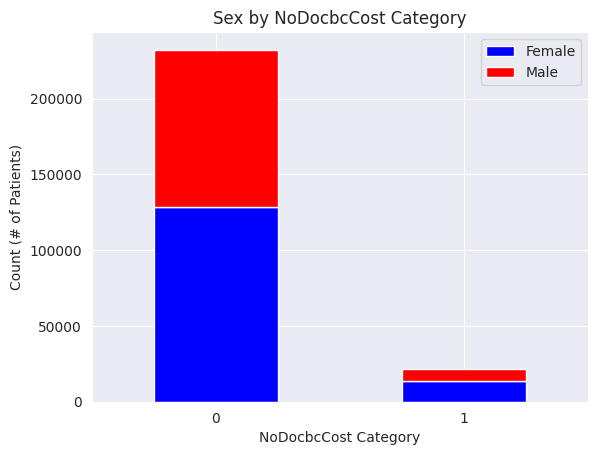

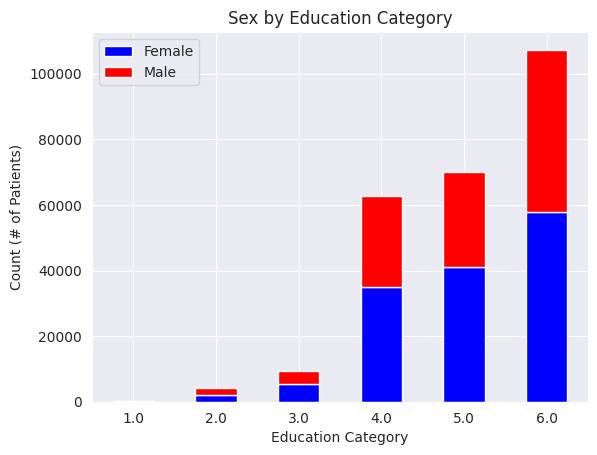

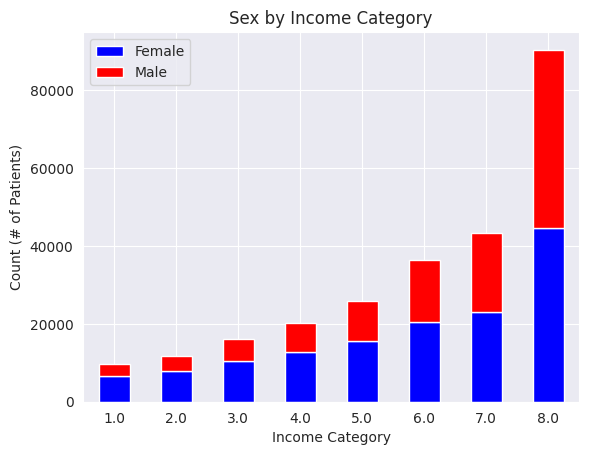

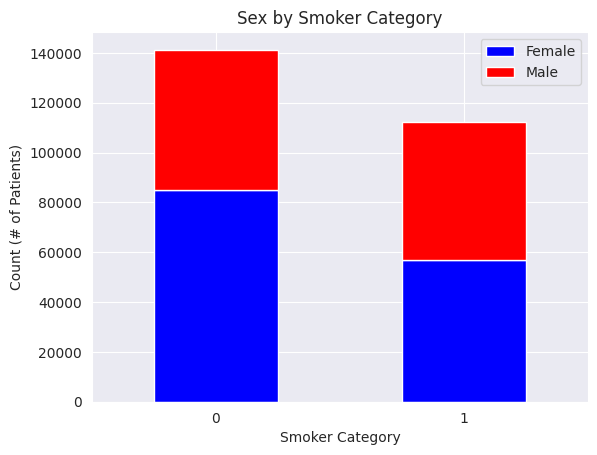

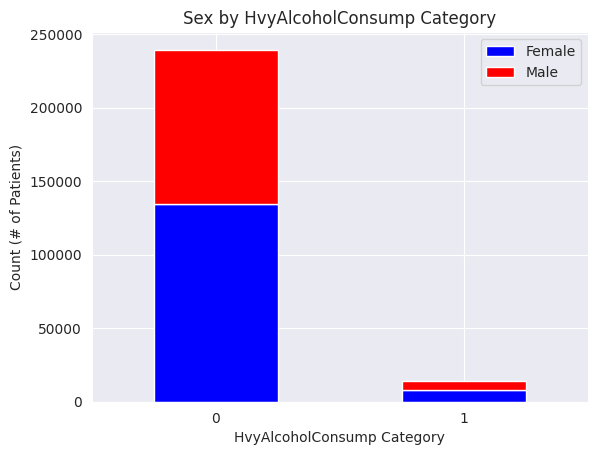

In [15]:
# third feature of interest: Sex

for social_determinant in social_determinants:
  grouped_df = df.groupby(social_determinant)['Sex'].value_counts().unstack()
  grouped_df.plot(kind = 'bar', stacked = True, color = ['blue', 'red'])

  plt.title(f'Sex by {social_determinant} Category')
  plt.xlabel(f'{social_determinant} Category')
  plt.ylabel('Count (# of Patients)')
  plt.xticks(rotation = 0)
  plt.legend(['Female', 'Male'])
  plt.show()

The third feature we visualized was the 'Sex' variable to see how sex of patients varies across social determinants. Looking at this variable can show us whether patients of a certain sex in this dataset are more common in certain social conditions/are more likely to exhibit certain social behaviors (drinking, smoking, etc.).

From the first graph, we can see that **for both patients who could access a doctor when they needed one (NoDocbcCost = 0) and for patients who could not (NoDocbcCost = 1), more patients were female than male, although there was a more equal split between sexes for patients who could access a doctor.** We would expect those who have access to a doctor to be relatively evenly distributed, though the large number of female patients who could not access a doctor as opposed to their male counterparts is notable. In the second graph, there is once again not enough information on patients who never attended school (Education = 1) to make a conclusion, and patient sexes seem evenly distributed for patients who attended school Grades 1-8 (Education = 2). However, for patients who had some high school education through some college education (Education = 3, 4, or 5), more patients were female than male in these categories. This is surprising as women have often been excluded from educational opportunities over their male counterparts, although the number of male patients in these categories may have been lower as they sought jobs or vocational opportunities instead of going to school. Finally, for patients who are college graduates (Education = 6), there was a pretty even split between male and female patients, with a slight skew towards female patients. **From this, there doesn't seem to be any strong relationship between sex and education level, though more patients in this dataset with higher education seem to be female than male.** The third graph depicting the relationship between income and sex shows that for patients who make anything less than 35,000 dollars per year categories (Income = 1, 2, 3, 4, 5), more patients tend to be female than male in these categories, although the proportion of female patients in each category declines as income increases. The same holds true for an income level of 6 (more females than males). For an income level of 7, there appears to be a somewhat even split between male and female patients. For an income level of 8 (patients who make $75,000 or more), there seems to be slightly more male than female patients. **These findings seem to indicate there are more female patients than male patients in lower income categories, with a more even distribution of sexes as income levels increase.** For both the fourth and fifth graphs, depicting the relationship between smoking and high alcohol consumption with general health, respectively, non-smokers (Smoker = 0) and those who did not consume high amounts of alcohol (HvyAlcoholConsumption = 0) had more female patients than male patients, which is especially noticeable for non-smokers. **This suggests that, amongst patients in this dataset, male patients are more likely to drink or smoke than female patients.** Smokers seemed evenly distributed as did the heavy drinkers category, though there is not much information for HvyAlcoholConsumption = 1 to make a definitive conclusion.


After comparing all three variables, it is worth noting that for some categories of patients, there is simply not enough data to make accurate conclusions, which can interfere with the analysis. This seemed especially true for patients for which Income = 1 and HvyAlcoholConsumption = 1, which had limited amounts of data across all three variables of interest. Additionally, because these stacked bar charts are showing pure counts for each variable of interest within each category, their absolute size is not comparable (this would only be the case if displaying proportions/percentages for each category, which is not the case).

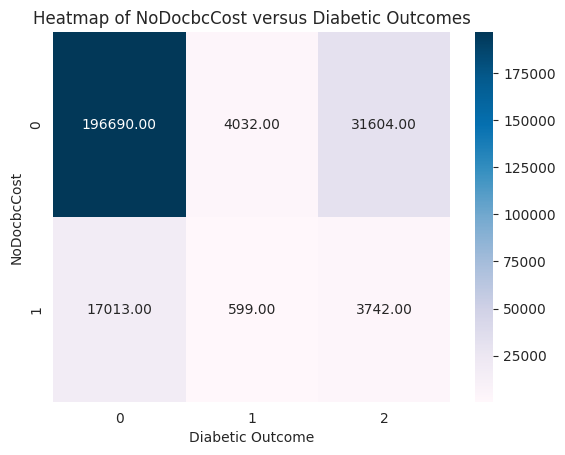

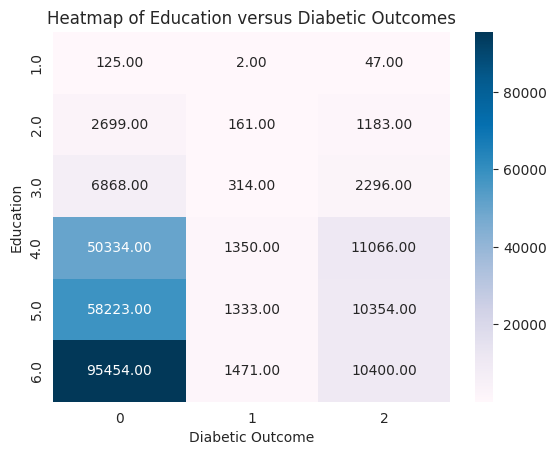

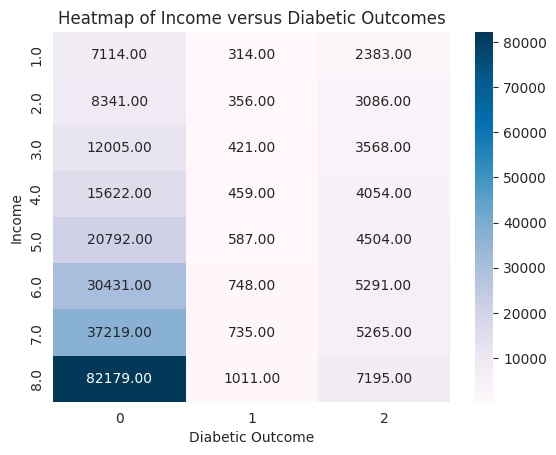

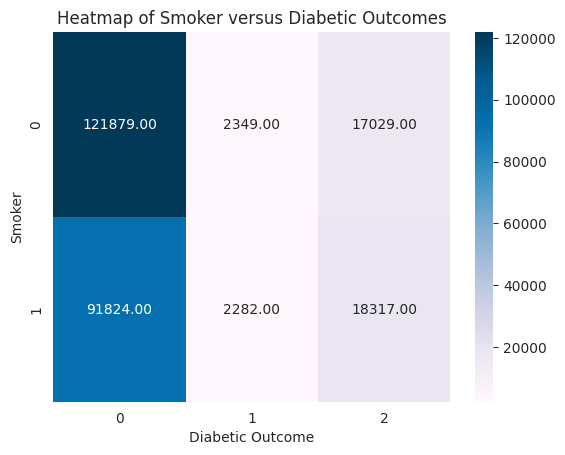

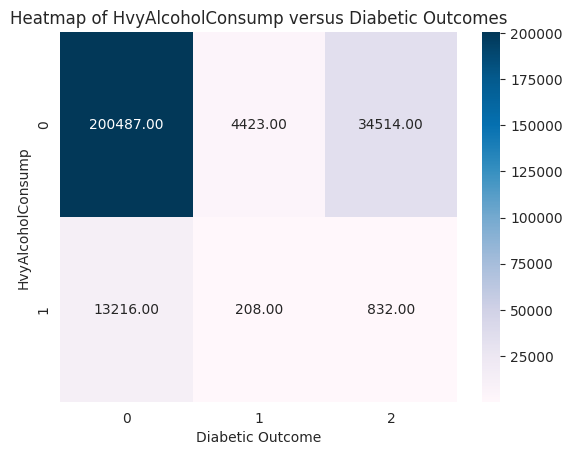

In [16]:
# visualize relationship between each social determinant of health and diabetic outcomes in the dataset using heatmaps
# resource: https://medium.com/geekculture/the-power-of-crosstab-function-in-pandas-for-data-analysis-and-visualization-6c085c269fcd
# resource: https://matplotlib.org/stable/users/explain/colors/colormaps.html

# find frequencies of each social determinant of health and diabetic outcome using cross-tabulation
for social_determinant in social_determinants:
  SDOH_freq = pd.crosstab(df[social_determinant], df['Diabetes_012'])

  # plot heatmap
  sns.heatmap(SDOH_freq, annot = True, cmap = 'PuBu', cbar = True, fmt = '.2f')
  plt.title(f'Heatmap of {social_determinant} versus Diabetic Outcomes')
  plt.xlabel('Diabetic Outcome')
  plt.ylabel(f'{social_determinant}')
  plt.show()

From these heatmaps, we can easily see the relationship between the frequencies of each category of social determinant and their respective diabetic outcome. In comparing 'NoDocbcCost' with diabetic outcomes, it is clear that amongst patients who did not have any issues visiting the doctor when needed, most were not diagnosed with diabetes (Diabetes_012 = 0). Similarly, for patients who did have trouble visiting the doctor, most were still not diagnosed with diabetes. **When comparing 'Education' with diabetic outcomes, most of the patients who were not diagnosed with diabetes (Diabetes_012 = 0) came from education levels greater than 4 (at least a high school graduate).** However, this was also the same for patients who were diagnosed with diabetes (Diabetes_012 = 2) or were pre-diabetic (Diabetes_012 = 1) with most pre-diabetics coming from the highest education group and most diabetics coming from the Education = 4 group. **These trends are similar when comparing diabetes diagnoses with income levels; of people who were not diagnosed with diabetes, most came from income levels of 6 or higher (make at least 35,000 dollars).** Of patients who were diagnosed as pre-diabetic, most came from the highest income group. Finally, for patients who were diagnosed with diabetes, most also came from the highest income level. These results are a bit confusing as patients in the highest income level were most likely to be diagnosed as healthy, pre-diabetic, and diabetic of patients who received those diagnoses, but maybe this indicates that there were more overall patients in the data from these income groups (increasing the absolute number of diagnoses regardless of which income group they're from). In the fourth heatmap, comparing 'Smoker' with diabetic outcome, **non-smokers in the data were mostly diagnosed as healthy**, with some patients diagnosed as pre-diabetic and few diagnosed with diabetes. **Surprisingly, smokers were also mostly diagnosed as healthy from a diabetic perspective**, though fewer smokers were diagnosed as healthy than non-smokers (about 92,000 patients compared to about 122,000 patients). Some were also diagnosed as pre-diabetic with a few diagnosed with diabetes, showing relative similarities in their proportions as non-smokers regarding diabetes diagnoses. **Finally, most patients who were not heavy drinkers were diagnosed as healthy (over 200,000 patients). This also applied to heavy drinkers, though there were fewer diagnosed as healthy (about 13,000 patients).** Once again, this may be because there were fewer overall patients who were considered heavy drinkers in the dataset, reducing their absolute numbers that limits the number of patients available for comparison against non-heavy drinkers. This must be considered when interpreting the results.

## Question 4a - (20 pts) - **Elizabeth**

- Perform significance tests to determine if the patterns that are detected above are statistically significant. **Ensure that you discuss at least 3 patterns and the respective p-values.**
- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling *Do not arbitrarily select features.*

*Note: if you are using correlations, ensure that this is only performed using continuous variables.*

In [17]:
# Import necessary library for statistical analysis
from scipy.stats import chi2_contingency

# List features of interest
social_determinants = ['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']
results = {}

# Perform chi-squared tests for features of interest
for social_determinant in social_determinants:
    contingency_table = pd.crosstab(df[social_determinant], df['Diabetes_012'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    results[social_determinant] = {'chi2': chi2, 'p-value': p}

# Analyze 3 patterns and their p-values
print("Discussion of patterns and p-values:\n")
for social_determinant, result in results.items():
    chi2 = result['chi2']
    p_value = result['p-value']
    if p_value < 0.05:
        significance = "statistically significant"
    else:
        significance = "not statistically significant"

    print(f"The relationship between {social_determinant} and diabetes is {significance}.")
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p_value}\n")


Discussion of patterns and p-values:

The relationship between NoDocbcCost and diabetes is statistically significant.
Chi-squared value: 396.08182159008913
P-value: 9.815789822340756e-87

The relationship between Education and diabetes is statistically significant.
Chi-squared value: 4560.6402794568585
P-value: 0.0

The relationship between Income and diabetes is statistically significant.
Chi-squared value: 7816.462905911266
P-value: 0.0

The relationship between Smoker and diabetes is statistically significant.
Chi-squared value: 1010.5117511111928
P-value: 3.7167324294119075e-220

The relationship between HvyAlcoholConsump and diabetes is statistically significant.
Chi-squared value: 850.3240478355594
P-value: 2.2619296719502035e-185



 Interpretation and results discussion of each feature:

1. NoDocbcCost

Chi-squared value: 396.08

P-value: 9.82e-87 (very close to zero)

Interpretation: There is a statistically significant relationship between having no doctor's cost barrier and diabetes. This means that individuals without barriers related to healthcare costs are significantly associated with diabetes compared to those with such barriers. A chi-squared value of 396.08 indicates a significant association between having no barrier to doctor's costs and diabetes. This means that individuals who do not face barriers related to healthcare costs (such as those who have insurance covering medical expenses fully) are significantly more likely to have diabetes compared to those who do face such barriers. The higher the chi-squared value, the stronger the association, suggesting that the absence of healthcare cost barriers is closely related to the presence of diabetes in the population studied.


2. Education

Chi-squared value: 4560.64

P-value: 0.0

Interpretation: There is a statistically significant relationship between education level and diabetes. Higher levels of education are significantly associated with diabetes compared to lower levels of education. A chi-squared value of 4560.64 indicates an extremely strong association between education level and diabetes. This suggests that higher levels of education are significantly associated with diabetes compared to lower levels of education. The large chi-squared value suggests a profound difference in diabetes prevalence across educational categories, making education a substantial factor in understanding and predicting diabetes risk.


 3. Income

Chi-squared value: 7816.46

P-value: 0.0

Interpretation: There is a statistically significant relationship between income and diabetes. Higher income levels are significantly associated with diabetes compared to lower income levels. The chi-squared value of 7816.46 indicates an exceptionally strong association between income levels and diabetes. This suggests that higher income levels are significantly associated with diabetes compared to lower income levels. The magnitude of this chi-squared value underscores the significant impact income disparities can have on diabetes prevalence, highlighting income as a critical social determinant influencing health outcomes.


4. Smoker

Chi-squared value: 1010.51

P-value: 3.72e-220 (very close to zero)

Interpretation: There is a statistically significant relationship between smoking and diabetes. Smokers are significantly associated with diabetes compared to non-smokers. A chi-squared value of 1010.51 indicates a strong association between smoking status and diabetes. This means that smokers are significantly more likely to have diabetes compared to non-smokers. The substantial chi-squared value suggests that smoking habits have a notable impact on diabetes risk, emphasizing the importance of smoking cessation as a preventive measure against diabetes.


5. HvyAlcoholConsump

Chi-squared value: 850.32

P-value: 2.26e-185 (very close to zero)

Interpretation: There is a statistically significant relationship between heavy alcohol consumption and diabetes. Heavy alcohol consumers are significantly associated with diabetes compared to non-heavy consumers. The chi-squared value of 850.32 indicates a strong association between heavy alcohol consumption and diabetes. This means that individuals who consume alcohol heavily are significantly more likely to have diabetes compared to those who do not consume alcohol heavily. The notable chi-squared value underscores the impact of heavy alcohol consumption on diabetes risk, highlighting it as a relevant factor in diabetes prevention and management.

## [Optional] Question 4b - (10 pts) - **Elizabeth**

This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following:

**1) Feature engineering:** Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the resons.

OR

**2) Statistical tests:** Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons. Note: you are welcome to use libraries to perform the tests.

In [18]:
# Import necessary library for statistical analysis
from scipy.stats import chi2_contingency

# Creating a new feature HealthBehaviorScore
# HealthBehaviorScore is composed on columns that relate to health and wellness
df['HealthBehaviorScore'] = (
    df['PhysActivity'] +
    df['Fruits'] +
    df['Veggies'] +
    (1 - df['HvyAlcoholConsump']) +
    (1 - df['Smoker'])
)

# Perform chi-squared test for the new feature
contingency_table = pd.crosstab(df['HealthBehaviorScore'], df['Diabetes_012'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Output results
print("Significance testing for new feature 'HealthBehaviorScore':")
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("The relationship between HealthBehaviorScore and diabetes is statistically significant.")
else:
    print("The relationship between HealthBehaviorScore and diabetes is not statistically significant.")

Significance testing for new feature 'HealthBehaviorScore':
Chi-squared value: 2995.9461039971766
P-value: 0.0
The relationship between HealthBehaviorScore and diabetes is statistically significant.


## Question 5 - (5 pts) - **Sophie**

Partition the data into train/test sets. After which, perform the following:

- Encode any categorical data. Ensure that categorical variables are represented correctly.
- Normalize numeric data.

**Tip:** Ensure that you sklearn to normalize and/or encode the training data, after which transform the test set (example in lecture)

In [19]:
# define input features and target
features_of_interest = ['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']
X = df[features_of_interest]
y = df['Diabetes_012']

In [20]:
# partition data into train/test splits, setting aside 20% of the data as the test set and random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [21]:
# encode any categorical data

# initialize categorical features (all chosen features are categorical)
categorical_features = ['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# fit and transform categorical features
X_train_encoded_features = encoder.fit_transform(X_train[features_of_interest])

# create new dataframe with encoded features, drop features from original dataframe, and merge with encoded dataframe
encoded_df_train = pd.DataFrame(X_train_encoded_features, columns = encoder.get_feature_names_out(features_of_interest))
X_train.drop(columns = features_of_interest, inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True), encoded_df_train], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# view the categories to ensure correct representation
encoder.categories_

[array([0, 1]),
 array([1., 2., 3., 4., 5., 6.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 array([0, 1]),
 array([0, 1])]

These categories look the same as they did prior to encoding, but it is still important to formally encode these categorical features so there are no errors when they are utilized in the ML algorithms.

In [23]:
# normalize numeric data

There is no numeric data to be normalized/scaled since all features are categorical data.

**The test set will be transformed in each ML model created in Question 6 individually.**

## Question 6 - (30 pts) - **ALL 1 model each**

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the **training**, **evaluation**, and **tuning** for *at least 3 algorithms that can handle non linear data and multiple input features/variables*. NOTE: you can only select one tree-based algorithm and you must select multiple input feature for the ML modeling.
- Use GridSearchCV to tune *at least two hyperparameters* **for each algorithm**.
- Note: do not change the input features in your experiments.

In [24]:
# @title Model 1 - Random Forest

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint
import numpy as np

# Sample the data (you can adjust the sample size based on computational resources)
sample_df = df.sample(n=10000, random_state=42)

# define input features and target
X = sample_df[['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']]
y = sample_df['Diabetes_012']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to handle class imbalance
class_weights = dict(zip(np.unique(y_train), np.bincount(y_train) / len(y_train)))

# Initialize random forest model with updated parameters
rf = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Define parameter distributions for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=10,  # Adjust number of iterations as needed
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Perform RandomizedSearchCV on training data
rf_random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Random Forest - Best Parameters:", rf_random_search.best_params_)
print("Random Forest - Best CV Accuracy:", rf_random_search.best_score_.round(2))

# Evaluate Random Forest on test set
rf_best = rf_random_search.best_estimator_
rf_pred = rf_best.predict(X_test)
print("\nRandom Forest - Test Accuracy:", accuracy_score(y_test, rf_pred))
target_names = ['Healthy', 'Pre-diabetes', 'Diabetes']
print(classification_report(y_test, rf_pred, target_names = target_names, zero_division=1))

# Train final model on full data with best parameters
best_params = rf_random_search.best_params_
rf_full = RandomForestClassifier(random_state=42, **best_params, class_weight=class_weights)

# Split full data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on full data
rf_full.fit(X_train_full, y_train_full)

# Evaluate on test set
rf_pred_full = rf_full.predict(X_test_full)
print("\nRandom Forest - Full Test Accuracy:", accuracy_score(y_test_full, rf_pred_full))
print(classification_report(y_test_full, rf_pred_full, zero_division=1))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 187}
Random Forest - Best CV Accuracy: 0.85

Random Forest - Test Accuracy: 0.8405
              precision    recall  f1-score   support

     Healthy       0.84      1.00      0.91      1681
Pre-diabetes       1.00      0.00      0.00        40
    Diabetes       1.00      0.00      0.00       279

    accuracy                           0.84      2000
   macro avg       0.95      0.33      0.30      2000
weighted avg       0.87      0.84      0.77      2000


Random Forest - Full Test Accuracy: 0.8405
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1681
           1       1.00      0.00      0.00        40
           2       1.00      0.00      0.00       279

    accuracy                           0.84      2000
   macro avg       0.95      0.33      0.30  

### Model 2 - SVM

In [25]:
# import necessary packages
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV

In [26]:
# Sample the data (you can adjust the sample size based on computational resources)
sample_df = df.sample(n = 10000, random_state = 42)

In [27]:
features_of_interest = ['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']
X = sample_df[features_of_interest]
y = sample_df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [28]:
# instantiate the SVM model
svm = SVC()

In [29]:
# train the model to the data
svm.fit(X_train, y_train)

SVC()

In [30]:
# predict the labels for the test set
y_pred_svm = svm.predict(X_test)
print('The predicted diabetic outcome is: {}'.format(y_pred_svm))

The predicted diabetic outcome is: [0 0 0 ... 0 0 0]


In [31]:
# evaluate the SVM model prediction accuracy
print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The accuracy of the model is: 0.846


In [32]:
# get the classification report
target_names = ['Healthy', 'Pre-diabetes', 'Diabetes']
print(classification_report(y_test, y_pred_svm, target_names = target_names))

              precision    recall  f1-score   support

     Healthy       0.85      1.00      0.92      1692
Pre-diabetes       0.00      0.00      0.00        36
    Diabetes       0.00      0.00      0.00       272

    accuracy                           0.85      2000
   macro avg       0.28      0.33      0.31      2000
weighted avg       0.72      0.85      0.78      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# set up parameter grid to try values of 'C' ranging from 1 to 10 and values of 'gamma' ranging from 1 to 5
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}
svm = SVC()

In [34]:
# use GridSearchCV to tune at least two hyperparameters ('C' and 'gamma' defined above) and perform cross validation
# we will return the training score for later use
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv = 5, return_train_score = True)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': array([1, 2, 3, 4])},
             return_train_score=True)

In [35]:
# display 1) the best parameters and 2) the best score obtained
print('The best parameters were:', svm_grid.best_params_)
print('The best score was:', svm_grid.best_score_.round(2))

The best parameters were: {'C': 1, 'gamma': 1}
The best score was: 0.85


In [36]:
# evaluate scores from GridSearchCV for training set and test set by displaying cv results for both
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending = False).round(2)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.85,0.0,0.85,0.0
4,0.85,0.0,0.84,0.0
1,0.85,0.0,0.84,0.0
2,0.85,0.0,0.84,0.0
32,0.85,0.0,0.84,0.0


In [37]:
# diagnose any bias-variance problems

The highest mean_test_score was about 0.845, which was coupled with a mean_train_score of about 0.848. The mean training score ranges from about 0.848 to about 0.850, which indicates relatively high accuracy from the model on the training data. This is supported by the relatively low standard deviation scores for the training data, which ranges from 0.0006 to about 0.0007. The mean test score ranges from about 0.844 to about 0.845, which are quite similar to the mean training scores. The test data also had lower standard deviation scores, ranging from about 0.0011 to 0.0013, meaning there was less variability in the model's test score predictions.

Based on this information, the model does not seem to be over/underfitting the data. The model shows similar mean test scores and mean training scores with a difference of roughly 0.003, suggesting the model was able to perform well with training data and unseen (test) data. Generally, we would say that the model displays low bias and low variance.

### Model 3 - Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# sample the data (you can adjust the sample size based on computational resources)
sample_df = df.sample(n=10000, random_state=42)

# define input features and target
features = ['NoDocbcCost', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump']
X = sample_df[features]
y = sample_df['Diabetes_012']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the featues
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create logistic regression model
logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

# train the model to the data
logreg.fit(X_train, y_train)

# predict the labels for the test set
y_pred_lr = logreg.predict(X_test)
print('The predicted diabetic outcome is: {}'.format(y_pred_lr))

# evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
target_names = ['Healthy', 'Pre-diabetes', 'Diabetes']
report = classification_report(y_test, y_pred_lr, target_names = target_names)

print("Test Set Accuracy: ", accuracy)
print("Classification Report: \n", report)

The predicted diabetic outcome is: [0 0 0 ... 0 0 0]
Test Set Accuracy:  0.5915
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.90      0.61      0.72      1681
Pre-diabetes       0.04      0.15      0.06        40
    Diabetes       0.23      0.57      0.33       279

    accuracy                           0.59      2000
   macro avg       0.39      0.44      0.37      2000
weighted avg       0.79      0.59      0.65      2000



In [39]:
# set up the parameter grid
params = {
    'C': [0.001, 0.01, 0.1, 1, 10],                               # Regularization parameter
    'penalty': ['l1', 'l2'],                                      # Penalty (l1 = Lasso, l2 = Ridge)
    'solver': ['liblinear']  # Solver for logistic regression
}

# create logistic regression model
logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

# create GridSearchSV
grid_search = GridSearchCV(estimator=logreg, param_grid = params, cv=5, scoring='accuracy', return_train_score=True)

# fit the model
grid_search.fit(X_train, y_train)

# display best parameters/best score obtained
print('The best parameters were:', grid_search.best_params_)
print('The best score was:', grid_search.best_score_.round(2))

# make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
target_names = ['Healthy', 'Pre-diabetes', 'Diabetes']
report = classification_report(y_test, y_pred_lr, target_names = target_names)

print("Test Set Accuracy: ", accuracy)
print("Classification Report: \n", report)

The best parameters were: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
The best score was: 0.85
Test Set Accuracy:  0.8405
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.84      1.00      0.91      1681
Pre-diabetes       0.00      0.00      0.00        40
    Diabetes       0.00      0.00      0.00       279

    accuracy                           0.84      2000
   macro avg       0.28      0.33      0.30      2000
weighted avg       0.71      0.84      0.77      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# evaluate GridSearchCV scores for training set and test set
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending = False).round(2)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.85,0.0,0.85,0.0
2,0.84,0.0,0.84,0.0
4,0.83,0.0,0.82,0.0
6,0.83,0.0,0.82,0.0
3,0.82,0.0,0.82,0.0


The Logistic Regression model was evaluated with different hyperparameter combinations, and the best-performing configuration {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'} achieved a best score of 0.85. This indicates that, on average, the model correctly predicted the target variable with an accuracy of 85% across the cross-validation folds. The mean_train_score ranged between 0.82 and 0.85 across different parameter settings, suggesting consistent performance during training. The mean_test_score ranged from 0.82 to 0.85, aligning closely with the training scores, which indicates that the model generalizes well to unseen data. The small difference of approximately 0.03 between mean_train_score and mean_test_score indicates low bias, suggesting that the model does not systematically underperform or overperform on training or test data. Both training and test scores have negligible standard deviations, implying low variability in model performance across different folds and suggesting stable predictions.

Overall, the Logistic Regression model demonstrates robust performance with both training and test data. The negligible differences between training and test scores, coupled with low standard deviations, indicate that the model is well-fit and capable of generalizing effectively to new data. Therefore, this model appears to be well-suited for predicting the target variable based on the selected features, demonstrating both low bias and low variance characteristics.

## Question 7 (15 pts) - **Jennifer**

Analyze the evaluated models. For each algorthm, ensure that you:
- Display: 1) the best model and 2) the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

1) Random Forest
  - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 187}
  - Best CV Accuracy: 0.85
  - The training and test accuracies are both high, indicating that the model generalizes well without overfitting.
  - The significant discrepancy in the recall and F1-scores for the 'Pre-Diabetes' and 'Diabetes' classes suggests that the model is heavily biased towards the 'Healthy' class, indicating a potential class imbalance in the dataset.
  - This imbalance may skew the interpretation of the overall accuracy.

2) SVM
  - Best Parameters: {'C': 1, 'gamma': 1}
  - Best CV Accuracy: 0.85
  - SVM tends to have a higher bias than Random Forest but can still achieve good generalization if properly regularized (controlled by C and gamma).
  - The similarity between the train and test scores indicate reasonable generalization.
  - Similar to the Random Forest model, the SVM model shows a strong bias towards the 'Healthy' class. The metrics reflect poor performance in predicting the minority classes.

3) Logistic Regression
  - Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
  - Best CV Accuracy: 0.85
  - Logistic Regression typically has lower variance compared to Random Forest and SVM, this is supported by the close training and test scores.


Overall, all three models show strong bias towards the 'Healthy' class and struggle with predicting 'Pre-Diabetes' and 'Diabetes' outcomes. The macro average metrics (precision, recall, F1-score) are consistently low across all models, reinforcing the need to address the class imbalance in the datasets and ensure fair representation of all outcome classes.

This imbalance could be addressed by resampling to provide balanced data to the models. Adjusting the class weights in the models might also improve classification. The features chosen might also play a role and selecting different features may help the models better capture the underlying patterns for all classes and perform better across all classes.

## Question 8 - (10 pts) - **Jennifer**

- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.

Individuals at risk of diabetes can benefit from early identification and proactive health management which allows time for lifestyle adjustments which can delay or even prevent the onset of diabetes. Healthcare providers will also benefit by having access to better risk assessment tools enabling them to deliver more targeted and effective approaches. Overall, enhanced predictive models can lead to better patient care and more efficient use of healthcare resources.

- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.

In [41]:
# rf_full, rf_pred
# y_pred_svm
# y_pred_lr

# make predictions with the best model
best_model = grid_search.best_estimator_

def predict_by_feature(feature_name):
  # split by feature
  X_test_grouped = df.groupby(feature_name)

  # predict for each group
  predictions = {}
  true_labels = {}

  # loop through each group and make predictions
  for feature_value, group in X_test_grouped:
    X_group = group[features]
    y_group = group['Diabetes_012']
    y_pred_group = best_model.predict(X_group.to_numpy())
    predictions[feature_value] = y_pred_group
    true_labels[feature_value] = y_group

  accuracy_scores = []
  feature_values = []

  # evaluate and print results
  for feature_value in predictions:
    y_pred_group = predictions[feature_value]
    y_true_group = true_labels[feature_value]

    accuracy = accuracy_score(y_true_group, y_pred_group)
    accuracy_scores.append(accuracy)
    feature_values.append(feature_value)

    target_names = ['Healthy', 'Pre-diabetes', 'Diabetes']
    report = classification_report(y_true_group, y_pred_group, target_names = target_names, zero_division=0)

    print("Income level: ", feature_value)
    print("Test Set Accuracy: ", accuracy)
    print("Classification Report: \n", report)

  sns.barplot(x=feature_values, y=accuracy_scores, palette='viridis', hue=feature_values, dodge=False, legend=False)
  plt.title(f'Model Accuracy by {feature_name}')
  plt.xlabel(feature_name)
  plt.ylabel('Accuracy')
  plt.ylim(0, 1)
  plt.show()

Income level:  1.0
Test Set Accuracy:  0.7251044745693609
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.73      1.00      0.84      7114
Pre-diabetes       0.00      0.00      0.00       314
    Diabetes       0.00      0.00      0.00      2383

    accuracy                           0.73      9811
   macro avg       0.24      0.33      0.28      9811
weighted avg       0.53      0.73      0.61      9811

Income level:  2.0
Test Set Accuracy:  0.7078842400067894
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.71      1.00      0.83      8341
Pre-diabetes       0.00      0.00      0.00       356
    Diabetes       0.00      0.00      0.00      3086

    accuracy                           0.71     11783
   macro avg       0.24      0.33      0.28     11783
weighted avg       0.50      0.71      0.59     11783

Income level:  3.0
Test Set Accuracy:  0.7505939727397775
Classification

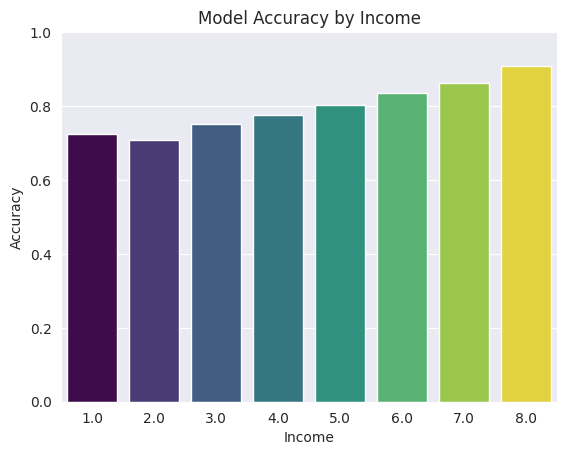

In [42]:
predict_by_feature('Income')

Income level:  1.0
Test Set Accuracy:  0.7183908045977011
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.72      1.00      0.84       125
Pre-diabetes       0.00      0.00      0.00         2
    Diabetes       0.00      0.00      0.00        47

    accuracy                           0.72       174
   macro avg       0.24      0.33      0.28       174
weighted avg       0.52      0.72      0.60       174

Income level:  2.0
Test Set Accuracy:  0.6675735839722978
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.67      1.00      0.80      2699
Pre-diabetes       0.00      0.00      0.00       161
    Diabetes       0.00      0.00      0.00      1183

    accuracy                           0.67      4043
   macro avg       0.22      0.33      0.27      4043
weighted avg       0.45      0.67      0.53      4043

Income level:  3.0
Test Set Accuracy:  0.7246254484068368
Classification

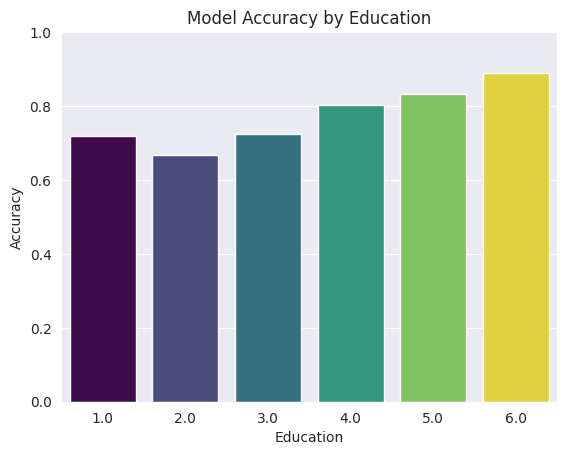

In [43]:
predict_by_feature('Education')

Income level:  1.0
Test Set Accuracy:  0.9826315789473684
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.98      1.00      0.99      5601
Pre-diabetes       0.00      0.00      0.00        21
    Diabetes       0.00      0.00      0.00        78

    accuracy                           0.98      5700
   macro avg       0.33      0.33      0.33      5700
weighted avg       0.97      0.98      0.97      5700

Income level:  2.0
Test Set Accuracy:  0.974466964990787
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.97      1.00      0.99      7404
Pre-diabetes       0.00      0.00      0.00        54
    Diabetes       0.00      0.00      0.00       140

    accuracy                           0.97      7598
   macro avg       0.32      0.33      0.33      7598
weighted avg       0.95      0.97      0.96      7598

Income level:  3.0
Test Set Accuracy:  0.9652971320686865
Classification 

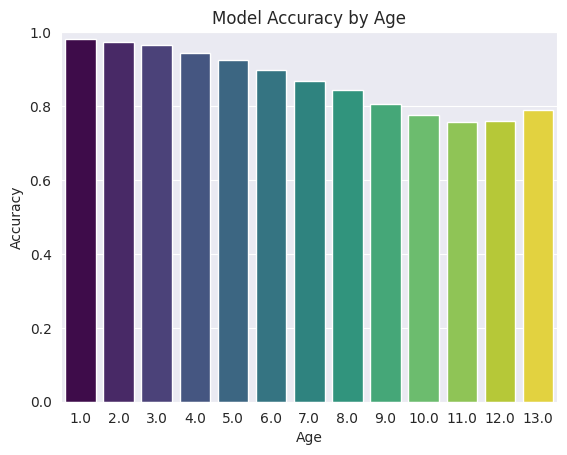

In [44]:
predict_by_feature('Age')

Income level:  0
Test Set Accuracy:  0.8519799399890121
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.85      1.00      0.92    120959
Pre-diabetes       0.00      0.00      0.00      2604
    Diabetes       0.00      0.00      0.00     18411

    accuracy                           0.85    141974
   macro avg       0.28      0.33      0.31    141974
weighted avg       0.73      0.85      0.78    141974

Income level:  1
Test Set Accuracy:  0.8302508370186024
Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.83      1.00      0.91     92744
Pre-diabetes       0.00      0.00      0.00      2027
    Diabetes       0.00      0.00      0.00     16935

    accuracy                           0.83    111706
   macro avg       0.28      0.33      0.30    111706
weighted avg       0.69      0.83      0.75    111706



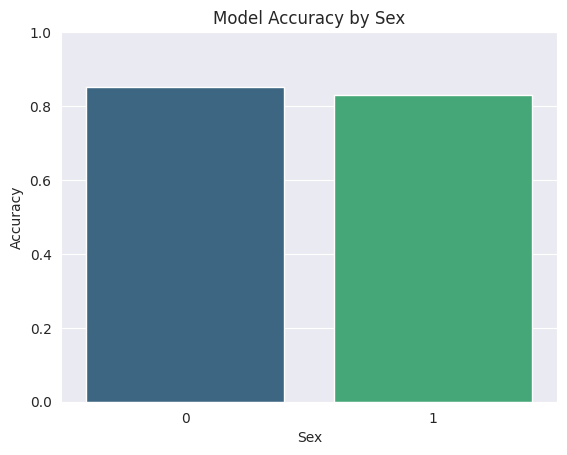

In [45]:
predict_by_feature('Sex')

In [46]:
print(df['Diabetes_012'].value_counts(normalize=True)*100)

Diabetes_012
0    84.241170
2    13.933302
1     1.825528
Name: proportion, dtype: float64


Protected classes like sex (gender), age, education, and income all pose an opportunity for bias. The function 'predict_by_feature()' splits the test data based on the specified 'feature_name' and makes predictions using the 'best_model' for each subgroup of the feature. Accuracy scores and classification reports are calculated to provide insights into how the model performs across different groups define by sensitive features.

The most obvious bias we found was with the imbalance of data in the classes of the 'Diabetes_012' feature, where 84% of the rows were Healthy and only 1.8% of the rows were Diabetes. In order to reduce bias in our models the training data should be balanced across all classes or the class weights need to be modified to be more representative of the population.

### Deliverables

1) the peer review (PDF format)

2) source code (python notebook) - the source code should contain the data preparation steps, model development, tuning and evaluations for all three models. After which, indicate the best model for the DS problem!

**Note: ensure that you document your code.**